# **1. Entrenamiento del modelo con dataset de la web**

# 1.1. Fase 1: Entendimiento del negocio

Un infarto de miocardio, comúnmente conocido como ataque al corazón, ocurre cuando el flujo de sangre a una parte del músculo cardíaco se bloquea severamente o por un tiempo prolongado, causando daño al músculo cardíaco.Es importante la predicción de un infarto de miocardio para aportar en la salud de las personas.

<p>**Algo de información del dataset**<p>

En general, las columnas 2 a 112 se pueden utilizar como datos de entrada para la predicción. Las posibles complicaciones (resultados) se enumeran en las columnas 113 a 124.
Hay cuatro momentos de tiempo posibles para la predicción de complicaciones: sobre la base de la información conocida en
1. el momento de ingreso al hospital: todas las columnas de entrada (2-112) excepto 93, 94, 95, 100, 101, 102, 103, 104, 105 se pueden utilizar para la predicción;
2. el final del primer día (24 horas después del ingreso al hospital): todas las columnas de entrada (2-112) excepto 94, 95, 101, 102, 104, 105 se pueden utilizar para la predicción;
3. al final del segundo día (48 horas después del ingreso al hospital) se pueden utilizar todas las columnas de entrada (2-112) excepto 95, 102, 105 para la predicción;
4. Al final del tercer día (72 horas después del ingreso al hospital), todas las columnas de entrada (2-112) se pueden utilizar para la predicción.Puede encontrar una descripción detallada de la base de datos, estadísticas descriptivas y la versión csv de la base de datos en DOI: 10.25392/leicester.data.12045261.v3

#1.2. Fase 2: Pequeño analisis

**Lectura de datos desde la pagina**

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC
from collections import Counter
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler


In [ ]:

# fetch dataset
myocardial_infarction_complications = fetch_ucirepo(id=579)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# data (as pandas dataframes)
X = myocardial_infarction_complications.data.features
y = myocardial_infarction_complications.data.targets

# dataframe completo
df = pd.concat([X, y], axis=1)

# metadata
print(myocardial_infarction_complications.metadata)

# variable information
print(myocardial_infarction_complications.variables)


{'uci_id': 579, 'name': 'Myocardial infarction complications', 'repository_url': 'https://archive.ics.uci.edu/dataset/579/myocardial+infarction+complications', 'data_url': 'https://archive.ics.uci.edu/static/public/579/data.csv', 'abstract': 'Prediction of myocardial infarction complications', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1700, 'num_features': 111, 'feature_types': ['Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C53P5M', 'creators': ['S.E. Golovenkin', 'V.A. Shulman', 'D.A. Rossiev', 'P.A. Shesternya', 'S.Yu. Nikulina', 'Yu.V. Orlova', 'V.F. Voino-Yasenetsky'], 'intro_paper': {'ID'

se puede observar que hay valores faltantes desde la variable 3 hasta la 111.

En este caso vamos a trabajar con la variable objetivo LET_IS por lo que eliminaré las demas, ya que no se usaran para este caso.

In [ ]:
y = y['LET_IS']

**Observación de los tipos de dato para X**

In [ ]:
X.dtypes

,0
AGE,float64
SEX,int64
INF_ANAM,float64
STENOK_AN,float64
FK_STENOK,float64
IBS_POST,float64
IBS_NASL,float64
GB,float64
SIM_GIPERT,float64
DLIT_AG,float64


**Observación de tipos de dato para variable objetivo (Y)**

In [ ]:
y.dtypes

dtype('int64')

A pesar de que ya esta como un valor numerico, más adelante tendremos que hacer codificación de esta variable, primero haré el tratamiento de datos faltantes



**Identificación de valores faltantes**

In [ ]:
def fn_missing_values(df):
    missing_values = df.isnull().sum()
    # Filter to show only columns with missing values
    missing_values = missing_values[missing_values > 0]
    return missing_values

In [ ]:
# Check for missing values in each column of X
missing_values = fn_missing_values(X)
print(missing_values)

AGE                 8
INF_ANAM            4
STENOK_AN         106
FK_STENOK          73
IBS_POST           51
IBS_NASL         1628
GB                  9
SIM_GIPERT          8
DLIT_AG           248
ZSN_A              54
nr_11              21
nr_01              21
nr_02              21
nr_03              21
nr_04              21
nr_07              21
nr_08              21
np_01              18
np_04              18
np_05              18
np_07              18
np_08              18
np_09              18
np_10              18
endocr_01          11
endocr_02          10
endocr_03          10
zab_leg_01          7
zab_leg_02          7
zab_leg_03          7
zab_leg_04          7
zab_leg_06          7
S_AD_KBRIG       1076
D_AD_KBRIG       1076
S_AD_ORIT         267
D_AD_ORIT         267
O_L_POST           12
K_SH_POST          15
MP_TP_POST         14
SVT_POST           12
GT_POST            12
FIB_G_POST         12
ant_im             83
lat_im             80
inf_im             80
post_im   

# **1.3. Fase 3: Preparación de los datos**

**1.3.1. Imputación de datos**

En la documentación de Dataset, como se mencionó al inicio de este Collab, se habla de 4 posibilidades para la clasificación, recien entra al hospital, a las 24 horas de entrar al hospital, a las 48 horas, y a las 72 horas. Dependiendo de esta, se eliminan algunas columnas.

En mi caso elegí la clasificación para las 24 horas despues de entrar al hospital, por lo anterior se exceptuaran las siguientes columnas, recomendadas por la documentación del dataset, para generar menos ruido:
* 94
* 95
* 101
* 102
* 104
* 105

Por ultimo cabe recalcar que las columnas mencionadas anteriormente estan dadas teniendo en cuenta columnas desde la 2 hasta la 112, pero en el Dataframe X esta la columna 2, osea la edad, con indice 0, por lo que habra que restarle 2 a la hora de la eliminación.

In [ ]:
# Lista de indices de las columnas que se eliminarán
first_columns_to_drop = [92, 93, 99, 100, 102, 103]
cols = list(X.columns)
# Sacar nombre de las columnas
to_drop = [cols[i] for i in first_columns_to_drop]
print("Columnas que se eliminarán:", to_drop)
# Eliminación
X = X.drop(columns=to_drop)

X.head()

Columnas que se eliminarán: ['R_AB_2_n', 'R_AB_3_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_2_n', 'NOT_NA_3_n']


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NOT_NA_1_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,138.0,NaN,NaN,NaN,8.0,16.0,4.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.38,0.18,NaN,7.8,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,100.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,132.0,0.30,0.11,NaN,10.8,NaN,3.0,3.0,1.0,1.0,1.0,0.0,1.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.9,0.0,146.0,0.75,0.37,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,100.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.45,0.22,NaN,8.3,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


Se procederá a imputar las columnas que tiene más del 60% de los datos faltantes, esto debido a que hay demaciados valores faltantes lo que podria causar un sesgo en el modelo o una pérdida de variabilidad,

In [ ]:
# Obtener las columnas que tienen más del 60% de los registros faltantes
imputed_columns = missing_values[missing_values > (0.6 * len(X))].index
# Eliminarlos de el dataframe de variables X

X.drop(imputed_columns, axis=1, inplace=True)  #Axis 1: paracolumnas, inplace true: para modificar el dataframe original

# Cuantas caracteristicas quedaron?
columns_dropped = len(imputed_columns)
print(f"El DataFrame X tiene {X.shape[1]} columnas, se eliminaro {columns_dropped}")

El DataFrame X tiene 101 columnas, se eliminaro 4


In [ ]:
# Check for missing values in each column of X
missing_values = fn_missing_values(X)
print(missing_values)

AGE                8
INF_ANAM           4
STENOK_AN        106
FK_STENOK         73
IBS_POST          51
GB                 9
SIM_GIPERT         8
DLIT_AG          248
ZSN_A             54
nr_11             21
nr_01             21
nr_02             21
nr_03             21
nr_04             21
nr_07             21
nr_08             21
np_01             18
np_04             18
np_05             18
np_07             18
np_08             18
np_09             18
np_10             18
endocr_01         11
endocr_02         10
endocr_03         10
zab_leg_01         7
zab_leg_02         7
zab_leg_03         7
zab_leg_04         7
zab_leg_06         7
S_AD_ORIT        267
D_AD_ORIT        267
O_L_POST          12
K_SH_POST         15
MP_TP_POST        14
SVT_POST          12
GT_POST           12
FIB_G_POST        12
ant_im            83
lat_im            80
inf_im            80
post_im           72
IM_PG_P            1
ritm_ecg_p_01    152
ritm_ecg_p_02    152
ritm_ecg_p_04    152
ritm_ecg_p_06

Se eliminaran las filas o registros que tengan más del 50% de las caracteristicas faltantes

In [ ]:
# Calculate the threshold for missing values (more than 50% of columns)
threshold = X.shape[1] * 0.5

# Get the indices of rows with more than the threshold number of missing values
rows_to_drop_indices = X[X.isnull().sum(axis=1) > threshold].index.tolist()

# Print the list of indices
print("Indices de las filas con más del 60% de valores faltantes:")
print(rows_to_drop_indices)
print("Visualizacion de la fila")
X.iloc[rows_to_drop_indices]

Indices de las filas con más del 60% de valores faltantes:
[1594]
Visualizacion de la fila


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NOT_NA_1_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
1594,81.0,0,1.0,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.7,0.0,140.0,0.75,0.52,8.7,27.0,1.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


El este caso se eliminará solo una fila del dataframe X y del dataframe objetivo(y), ya que esta eliminación de fila tambien la afecta.

In [ ]:
X.drop(rows_to_drop_indices, axis=0, inplace=True)
y.drop(rows_to_drop_indices, axis=0, inplace=True)
y.head()

/tmp/ipython-input-848693806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.drop(rows_to_drop_indices, axis=0, inplace=True)


,LET_IS
0,0
1,0
2,0
3,0
4,0


Ahora vamos a utilizar la moda como tecnica de imputación de datos para las variables categoricas y binarias, ya que si utilizamos media o moda no tendria sentido, por ejemplo si rellenamos la edad(1:masculino 2:femenino), que es binaria, con el promedio nos daria algo entre 0 y 1 lo que no tiene sentido.

Primero identificamos las variables que tienen valores faltantes y son categoricas o binarias.

In [ ]:
myocardial_infarction_complications.variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,Record ID (ID): Unique identifier. Cannot be r...,None,no
1,AGE,Feature,Integer,Age,Age of patient.,None,no
2,SEX,Feature,Binary,Sex,"0: female, 1: male",None,no
3,INF_ANAM,Feature,Categorical,None,Quantity of myocardial infarctions in the anam...,None,yes
4,STENOK_AN,Feature,Categorical,None,Exertional angina pectoris in the anamnesis. \...,None,yes
5,FK_STENOK,Feature,Categorical,None,Functional class (FC) of angina pectoris in th...,None,yes
6,IBS_POST,Feature,Categorical,None,"Coronary heart disease (CHD) in recent weeks, ...",None,yes
7,IBS_NASL,Feature,Binary,None,Heredity on CHD\n\n0: isn't burdened\n\n1: bur...,None,yes
8,GB,Feature,Categorical,None,Presence of an essential hypertension \n\n0: t...,None,yes
9,SIM_GIPERT,Feature,Binary,None,Symptomatic hypertension,None,yes


In [ ]:
# Get the list of categorical and binary features from myocardial_infarction_complications.variables
categorical_binary_features_info = myocardial_infarction_complications.variables[
    myocardial_infarction_complications.variables['type'].isin(['Categorical', 'Binary'])
]

# Get the names of the categorical and binary features
categorical_binary_features_info = categorical_binary_features_info['name'].tolist()

# Filter the list to include only those present in the current X DataFrame
categorical_features_in_X = [col for col in categorical_binary_features_info if col in X.columns]

# Identify categorical features in X that have missing values
categorical_features_with_missing_values = [
    col for col in categorical_features_in_X if col in missing_values.index
]

# Store the names of these features in a variable
categorical_missing_columns = categorical_features_with_missing_values

print("Categorical and binary variables with missing values:")
print(categorical_missing_columns)



Categorical and binary variables with missing values:
['INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_

In [ ]:
# Impute missing values in categorical_missing_columns with the mode
for col in categorical_missing_columns:
    mode_value = X[col].mode()[0]  # Calculate the mode with [0] to get a scalar and not a Series
    X[col] = X[col].fillna(mode_value) # Fill missing values with the mode

# Get again missing values
print("Missing values after imputation:\n")
missing_values = fn_missing_values(X)
print(missing_values)

Missing values after imputation:

AGE            8
S_AD_ORIT    267
D_AD_ORIT    267
K_BLOOD      371
NA_BLOOD     375
ALT_BLOOD    284
AST_BLOOD    285
L_BLOOD      125
ROE          203
NA_R_1_n       5
dtype: int64


Ahora tendremos que analizar la distribución de los datos en las variables faltantes que no son ni binarias ni categoricas para decidir si utilizar la moda, media o mediana.

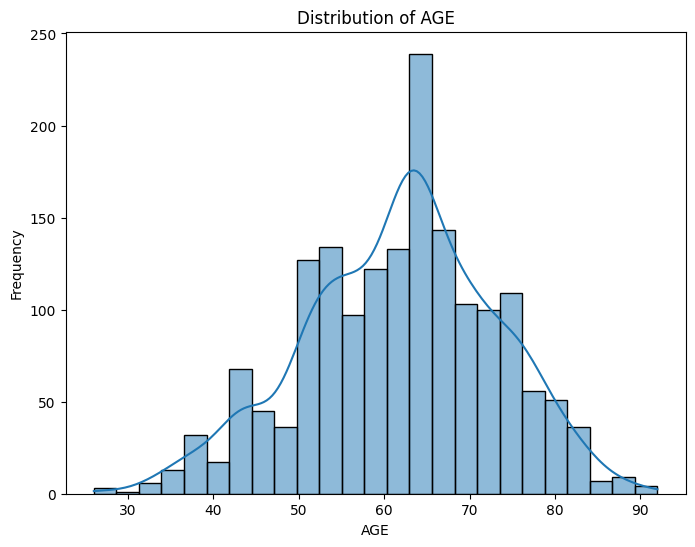

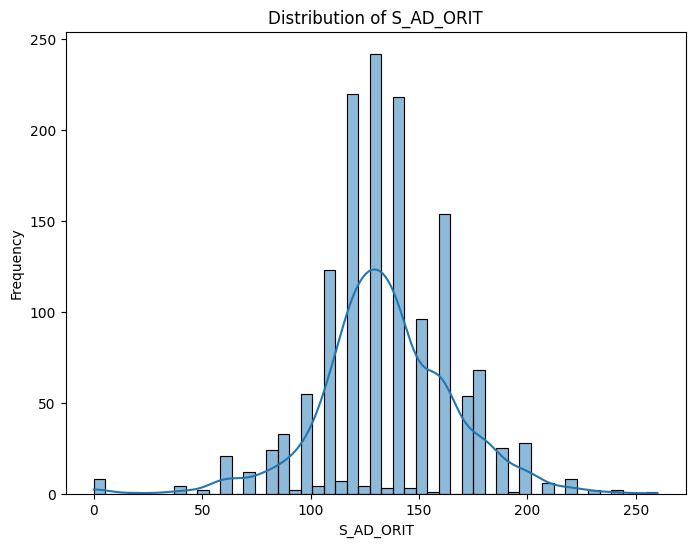

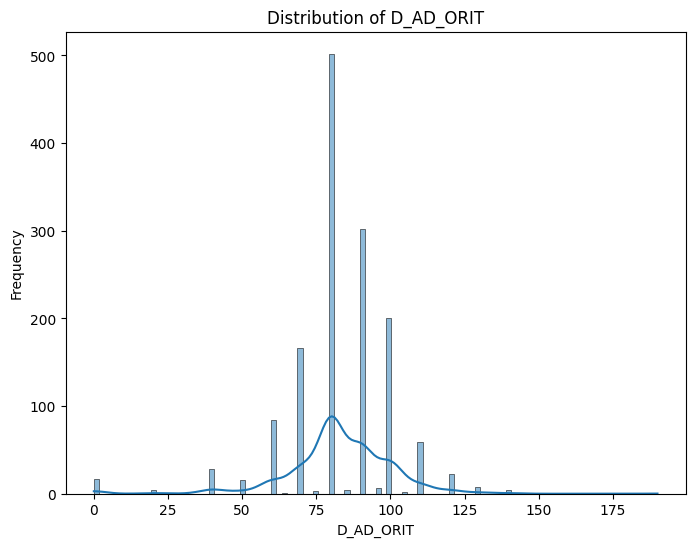

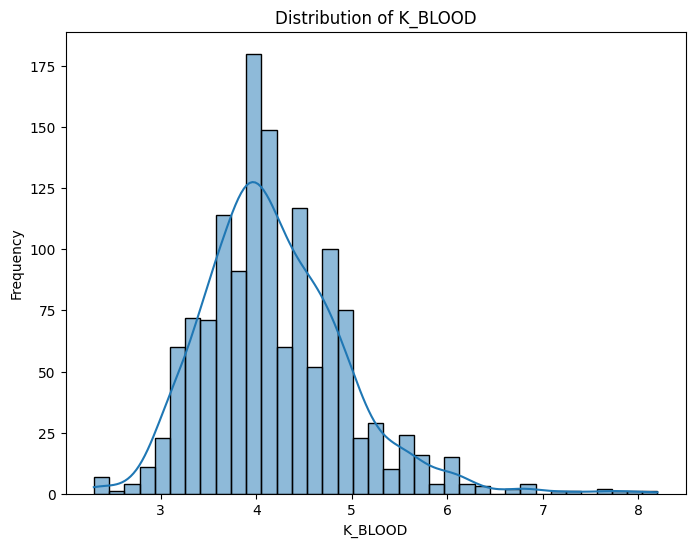

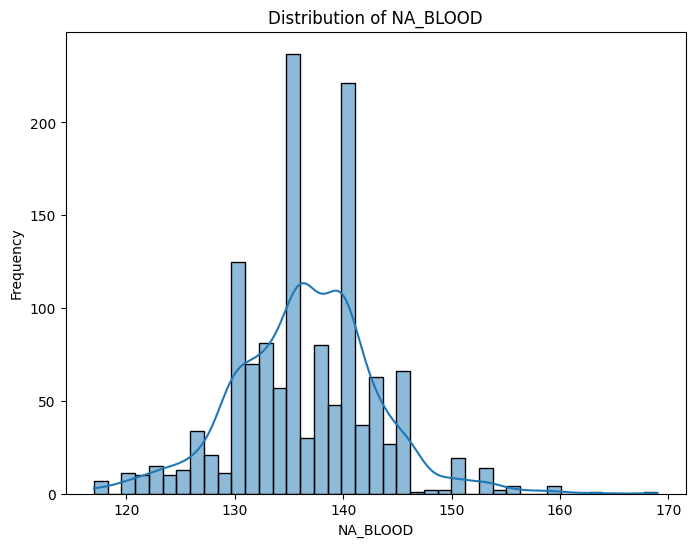

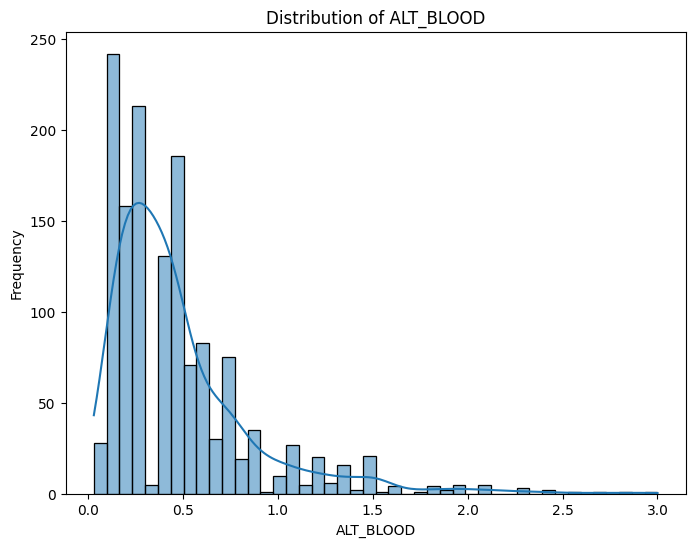

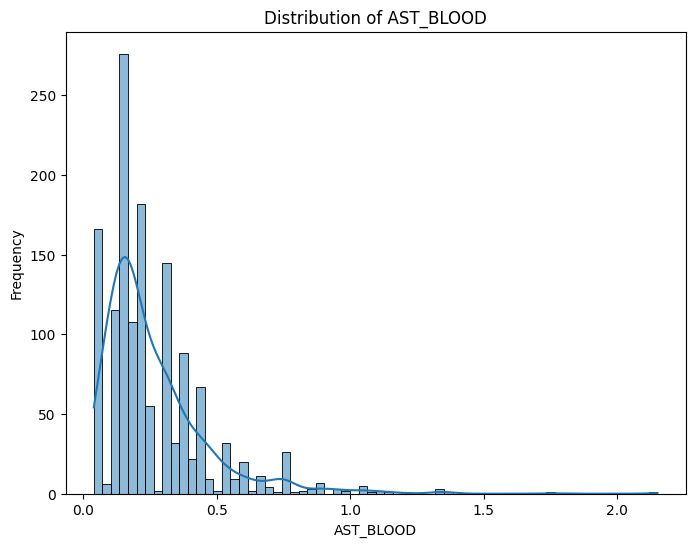

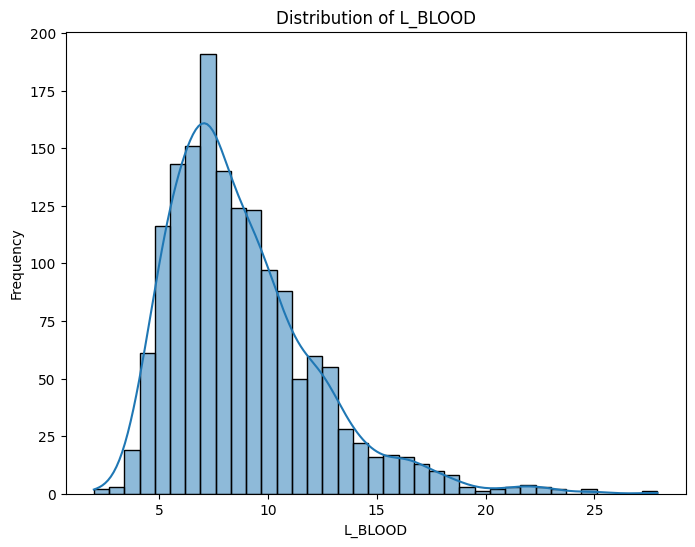

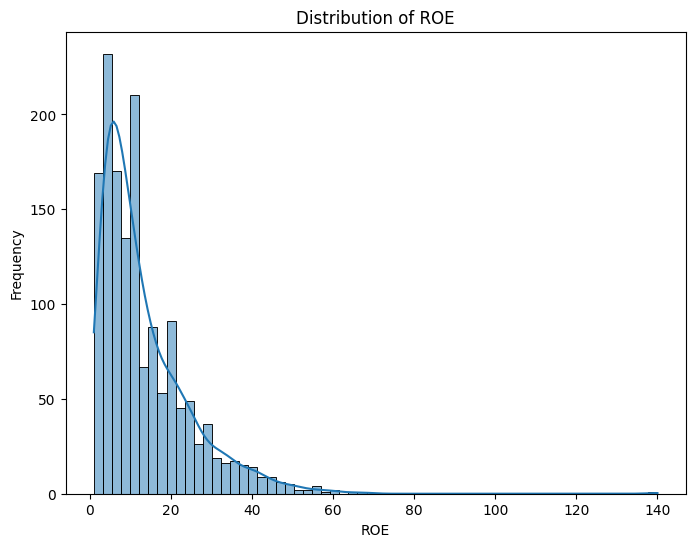

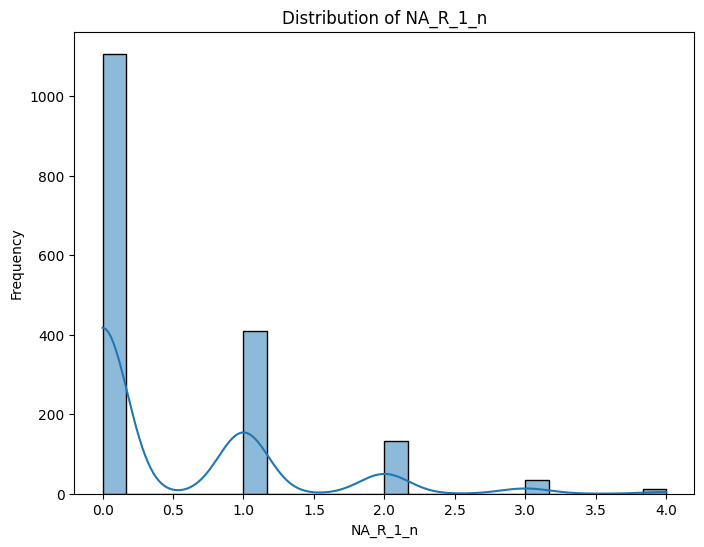

In [ ]:
# Get the list of columns with missing values
remaining_missing_columns = missing_values.index.tolist()

# Plot histograms for each remaining column with missing values
for col in remaining_missing_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(X[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Despues de observar la distribución de las variables que quedan llegamos a los siguientes 2 pasos:


1.   Aplicar imputación basica con mediana para todas excepto la ultima
2.   Aplicar imputación basica con moda para la ultima



La justificación del primer paso es que ninguna variable tiene una distribución normal perfecta, todas tienen cierto nivel de sesgo a la derecha o a la izquierda por lo que he decidido mejor usar la moda para la imputación de de estas.

La justificación del segundo paso es porque la ultima variable(NA_R_1_n) son variables cuantitativas discretas que no tienen muchos valores faltantes(entre 5 y 130) y respecto a la cantidad total de registros actuales(1699) tienen siempre un valor que tiene más frecuencia que los demas(0).


**Paso 1**

In [ ]:
# Get the list of columns to impute with median (all except the last one)
columns_to_impute_median = remaining_missing_columns[:-1]

# Impute missing values in these columns with the median
for col in columns_to_impute_median:
    median_value = X[col].median()
    X[col] = X[col].fillna(median_value) # Fill missing values with the median


print("Missing values after imputing with median:")
last_missing_values = fn_missing_values(X)
print(last_missing_values)

Missing values after imputing with median:
NA_R_1_n    5
dtype: int64


**Paso 2**

In [ ]:
columns_to_impute_mode = last_missing_values.index.tolist()

# Impute with the mode
for col in columns_to_impute_mode:
    mode_value = X[col].mode()[0]
    X[col] = X[col].fillna(mode_value)

print("Is there missing values?:")
last_missing_values = fn_missing_values(X)
print(len(last_missing_values) if len(last_missing_values) > 0 else "No")

Is there missing values?:
No


Hemos finalizado el proceso de imputación de datos, ahora vamos al siguiente paso, la codificación de la salida.

**1.3.2. Codificación de la salida**

La variable de salida ya esta medianamente codificada, ya que no tiene valores con letras o algo por el estilo, ya estan con numeros por clase, solo faltaría separar las clases por columna, creando en total 8 columnas para el output.

In [ ]:
y_encoded = pd.get_dummies(y, prefix='class', dtype=int)
y_encoded.head()

,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


# **Distribución de clases**

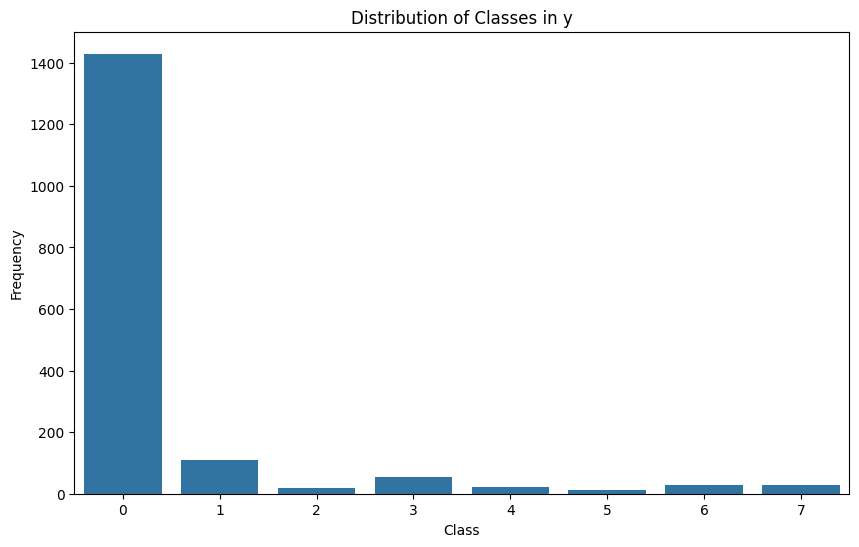

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=y.to_frame(), x=y.name)
plt.title('Distribution of Classes in y')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

Se puede observar un claro desbalance en los datos por la dominancia que hay para el feauture 0, por lo que tendremos que balancearlos.

Se probara primero entrenando un modelo sin balancear ni normalizar, despues un modelo balanceado y por ultimo un modelo balanceado y normalizado.

# **Separación de los datos**

Para evitar la fuga de datos se procederar a hacer la divición de los datos antes cualquier proceso de balanceo y normalización, que lo haremos más adelante.

In [ ]:
SEED = 123
np.random.seed(SEED)
random.seed(SEED)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, shuffle=True, random_state=SEED, stratify=y_encoded)
print(len(x_train))
print(len(x_test))

1189
510


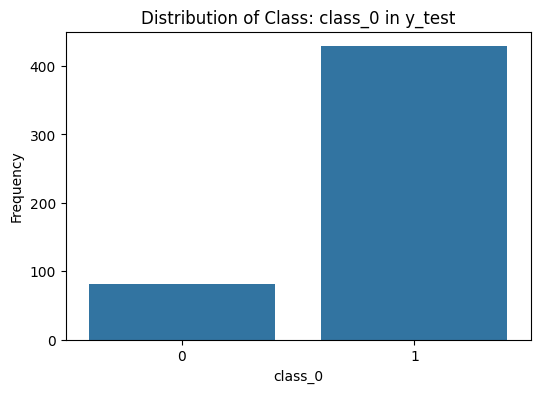

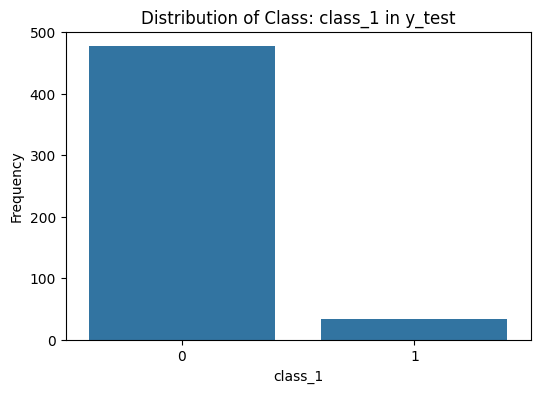

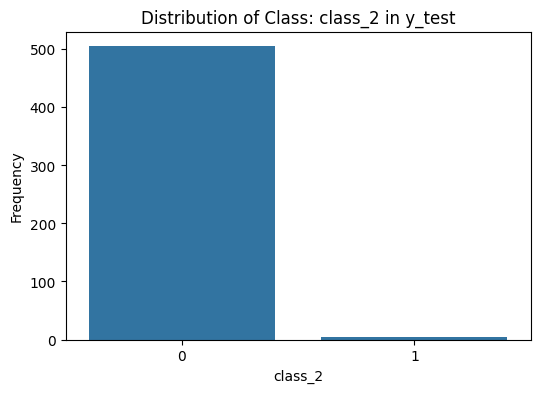

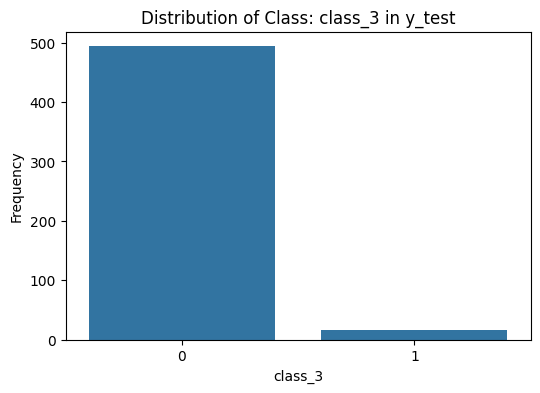

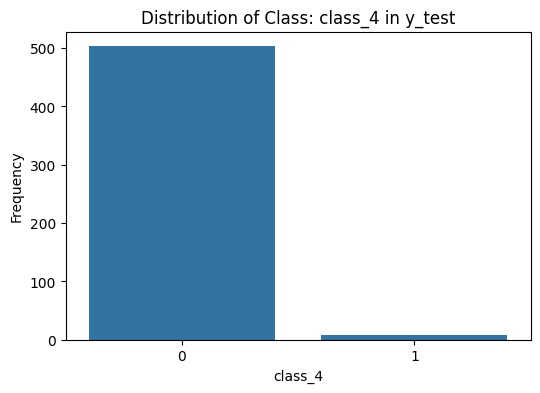

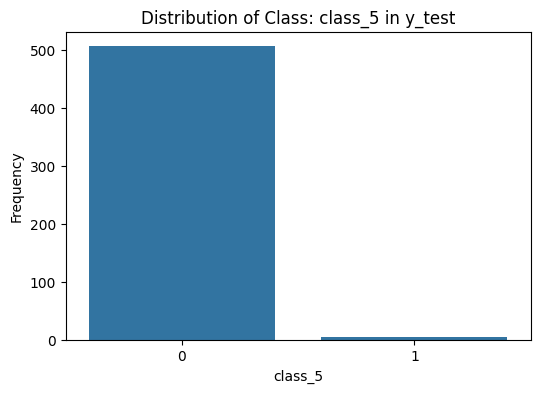

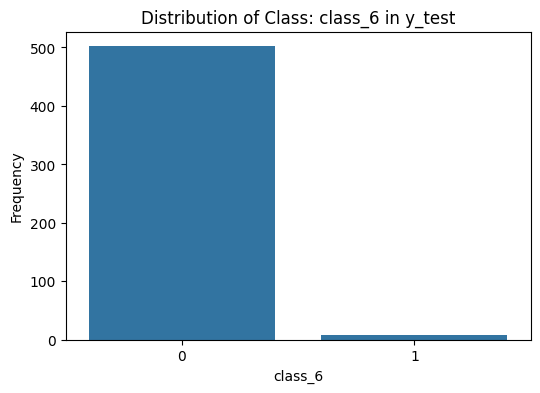

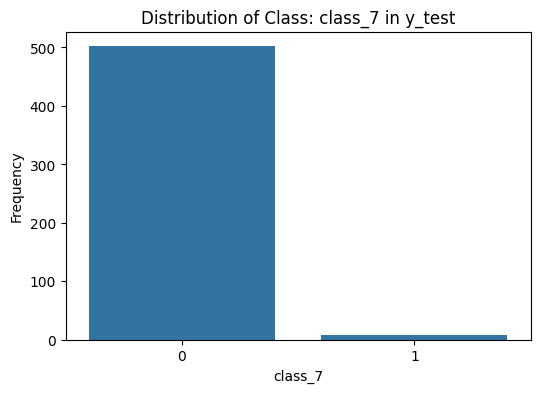

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of each class in y_test
for col in y_test.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=y_test, x=col)
    plt.title(f'Distribution of Class: {col} in y_test')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

 **Preparacion para modelo Balanceado sin normalizar**

 **SMOTENC**

Se uso SMOTENC debido a que el dataset contiene variable categirocas y binarias, la mejor opcion es usar SMOTENC en vez de SMOTE debido a que smote toma en cuenta las variables como si fuesen numericas, obteniendo valores de 0.0545... para variables que solo toman valores de 0 a 3.
Adicionalmente, lo haremos con la separacion de datos anteriormente hecha, **con x_train y y_train**.

In [ ]:
# Get the numerical labels from the one-hot encoded y_train
y_train_labels = y_train.values.argmax(axis=1)

target_samples = int(Counter(y_train_labels)[0] / 2)
sampling_strategy = {cls: target_samples for cls in Counter(y_train_labels) if cls != 0}
sampling_strategy[0] = Counter(y_train_labels)[0]

# --- identify categorical columns ---

categorical_cols_info = myocardial_infarction_complications.variables[
    myocardial_infarction_complications.variables['type'].isin(['Categorical', 'Binary'])
]['name'].tolist()

# Filter to include only columns present in the current X DataFrame
categorical_cols = [col for col in x_train.columns if col in categorical_cols_info]

# get indices (SMOTENC expects indices relative to X columns)
categorical_indices = [x_train.columns.get_loc(c) for c in categorical_cols]


# --- apply SMOTENC ---
smote_nc = SMOTENC(categorical_features=categorical_indices,
                   random_state=42,
                   sampling_strategy=sampling_strategy)
X_res_np, y_res = smote_nc.fit_resample(x_train.values, y_train_labels)  # returns numpy array

# convert back to DataFrame and restore column names
X_res = pd.DataFrame(X_res_np, columns=x_train.columns)

# Round & cast categorical columns just to be safe, then clip to original range
for c in categorical_cols:
    X_res[c] = X_res[c].round().astype(int)
    X_res[c] = X_res[c].clip(lower=int(x_train[c].min()), upper=int(x_train[c].max()))

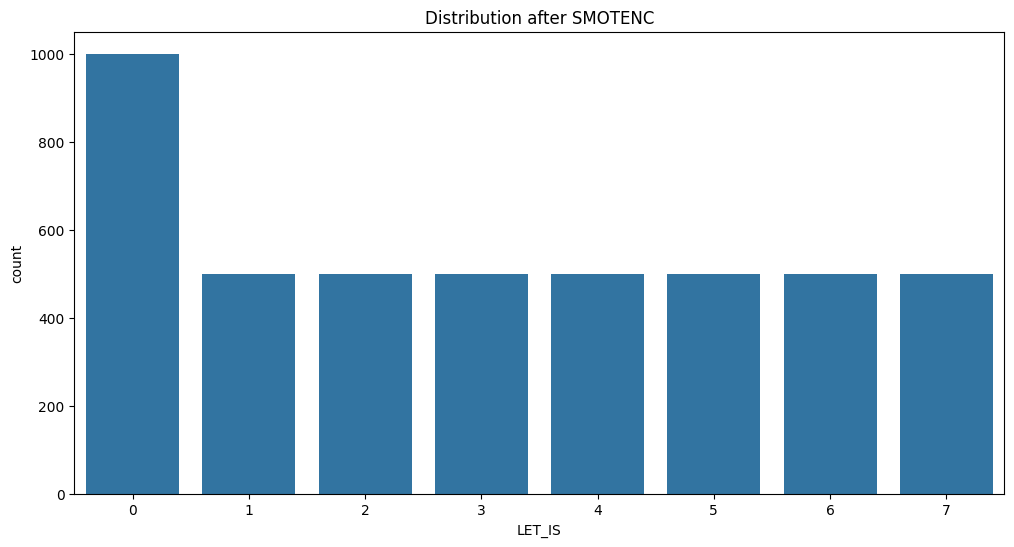

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=pd.Series(y_res, name=y.name).to_frame(), x=y.name)
plt.title('Distribution after SMOTENC')
plt.show()

El balanceo de los datos con SMOTENC se hizo solo hasta el 50% de la cantidad de datos que tiene la clase 0, que es la que predomina, esto para no generar un posible overfitting, igual la idea seria ir probando con los resultados del modelo que va funcionando.

In [ ]:
print(len(y_train))
print(len(y_res))
print(len(x_train))
print(len(X_res))

1189
4500
1189
4500


**codifcación de la variable de salida balanceada**

In [ ]:
y_encoded = pd.get_dummies(y_res, prefix='class', dtype=int)
y_encoded.head()

print("Number of rows in y_res:", len(y_res))
print("Number of rows in y_encoded:", len(y_encoded))


Number of rows in y_res: 4500
Number of rows in y_encoded: 4500


**Noralización de datos de entrada para entrenamiento sin balancear**

In [ ]:
x_train.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NOT_NA_1_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
1005,70.0,1,0.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,130.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,136.0,1.36,0.75,8.3,19.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1137,44.0,1,3.0,2.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,180.0,100.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.4,0.0,136.0,1.74,0.45,2.0,23.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1212,80.0,1,1.0,6.0,2.0,1.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,146.0,0.15,0.07,9.4,10.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1281,63.0,1,2.0,3.0,2.0,2.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,150.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.8,0.0,136.0,0.11,0.23,9.2,6.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
961,42.0,1,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,136.0,0.30,0.37,10.6,10.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
import joblib

# Get the list of categorical and binary features
categorical_cols_info = myocardial_infarction_complications.variables[
    myocardial_infarction_complications.variables['type'].isin(['Categorical', 'Binary'])
]['name'].tolist()

# Filter the list to include only columns present in the current x_train DataFrame
categorical_cols_in_train = [col for col in categorical_cols_info if col in x_train.columns]


# Identify numerical columns in x_train by excluding categorical and binary columns
numerical_cols_train = [col for col in x_train.columns if col not in categorical_cols_info]

scaler_mm = MinMaxScaler()
# Fit the scaler with the numerical columns of the training data
scaler_mm.fit(x_train[numerical_cols_train])

# Transform the numerical columns of the training data
X_train_scaled_numerical = scaler_mm.transform(x_train[numerical_cols_train])

# Convert the scaled numerical data back to a DataFrame
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_cols_train, index=x_train.index)

# Concatenate the scaled numerical columns with the original categorical and binary columns
X_nom_without_balance = pd.concat([X_train_scaled_numerical_df, x_train[categorical_cols_in_train]], axis=1)

# Ensure the columns are in the same order as the original x_train DataFrame
X_nom_without_balance = X_nom_without_balance[x_train.columns]

# Save the scaler
joblib.dump(scaler_mm, "scaler_mm.pkl")

['scaler_mm.pkl']

**Normalización de datos de entrada para entrenamiento balanceados**

In [ ]:
# Get the list of categorical and binary features
categorical_cols_info = myocardial_infarction_complications.variables[
    myocardial_infarction_complications.variables['type'].isin(['Categorical', 'Binary'])
]['name'].tolist()

# Filter the list to include only columns present in the current X_res DataFrame
categorical_cols_in_res = [col for col in categorical_cols_info if col in X_res.columns]

# Identify numerical columns in X_res by excluding categorical and binary columns
numerical_cols_res = [col for col in X_res.columns if col not in categorical_cols_info]

scaler_mm_res = MinMaxScaler()
# Fit the scaler with the numerical columns of the balanced training data
scaler_mm_res.fit(X_res[numerical_cols_res])

# Transform the numerical columns of the balanced training data
X_res_scaled_numerical = scaler_mm_res.transform(X_res[numerical_cols_res])

# Convert the scaled numerical data back to a DataFrame
X_res_scaled_numerical_df = pd.DataFrame(X_res_scaled_numerical, columns=numerical_cols_res, index=X_res.index)

# Concatenate the scaled numerical columns with the original categorical and binary columns
X_nom = pd.concat([X_res_scaled_numerical_df, X_res[categorical_cols_in_res]], axis=1)

# Ensure the columns are in the same order as the original X_res DataFrame
X_nom = X_nom[X_res.columns]

**Normalización de datos de entrada para test**

In [ ]:

# Get the list of categorical and binary features
categorical_cols_info = myocardial_infarction_complications.variables[
    myocardial_infarction_complications.variables['type'].isin(['Categorical', 'Binary'])
]['name'].tolist()

# Filter the list to include only columns present in the current x_test DataFrame
categorical_cols_in_test = [col for col in categorical_cols_info if col in x_test.columns]


# Identify numerical columns in x_test by excluding categorical and binary columns
numerical_cols_test = [col for col in x_test.columns if col not in categorical_cols_info]

scaler_mm = MinMaxScaler()
# Fit the scaler with the numerical columns of the training data
scaler_mm.fit(x_test[numerical_cols_test])

# Transform the numerical columns of the training data
X_test_scaled_numerical = scaler_mm.transform(x_test[numerical_cols_test])

# Convert the scaled numerical data back to a DataFrame
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_cols_test, index=x_test.index)

# Concatenate the scaled numerical columns with the original categorical and binary columns
X_nom_test = pd.concat([X_test_scaled_numerical_df, x_test[categorical_cols_in_test]], axis=1)


X_nom_test = X_nom_test[x_test.columns]


# **1.4 Fase 4: Construcción de los modelos**

 **1.4.1. Modelo sin balancear y sin normalizar**

In [ ]:

# Funcion de evaluación la cual retorna metricas
def evaluate_classifier_and_get_metrics(classifier, x_test, y_test, target_names, title_prefix=""):
    """
    Evalúa el clasificador, muestra gráficos y retorna un diccionario con las métricas.
    """
    print(f"\n--- {title_prefix} ---")
    y_pred = classifier.predict(x_test)

    # Obtener reporte de clasificación como un diccionario
    report_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True, zero_division=0)

    # Obtener accuracy general
    accuracy = accuracy_score(y_test, y_pred)
    report_dict['accuracy'] = accuracy  # Añadir accuracy al diccionario

    # Imprimir resumen
    print(f"Overall Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))

    # Matriz de Confusión
    y_test_labels = np.argmax(y_test.values, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_test_labels, y_pred_labels)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.title(f'Matriz de Confusión - {title_prefix}')
    plt.show()

    # Retornar el diccionario con todas las métricas
    return report_dict

In [ ]:
model_seed = 7
random.seed(model_seed)
np.random.seed(model_seed)

classifier1 = MLPClassifier(solver='adam', random_state=model_seed ,activation='relu', alpha=1e-12,tol=1e-12,
                    hidden_layer_sizes=(10,8),learning_rate='constant',
                    learning_rate_init=0.01, max_iter=500, momentum=0.9, verbose=True)

**Entrenar modelo(sin balancear y sin normalizar)**

Iteration 1, loss = 13.48312914
Iteration 2, loss = 4.22564499
Iteration 3, loss = 1.95798470
Iteration 4, loss = 1.50127219
Iteration 5, loss = 1.18675368
Iteration 6, loss = 1.12798479
Iteration 7, loss = 1.07690860
Iteration 8, loss = 1.03795622
Iteration 9, loss = 1.00593018
Iteration 10, loss = 0.99038239
Iteration 11, loss = 0.98029507
Iteration 12, loss = 0.96499729
Iteration 13, loss = 0.95823926
Iteration 14, loss = 0.94372525
Iteration 15, loss = 0.94240423
Iteration 16, loss = 0.92731200
Iteration 17, loss = 0.91874461
Iteration 18, loss = 0.90812619
Iteration 19, loss = 0.90666826
Iteration 20, loss = 0.89722091
Iteration 21, loss = 0.88523605
Iteration 22, loss = 0.87491802
Iteration 23, loss = 0.88044814
Iteration 24, loss = 0.87129949
Iteration 25, loss = 0.85888771
Iteration 26, loss = 0.84947884
Iteration 27, loss = 0.84923748
Iteration 28, loss = 0.83045562
Iteration 29, loss = 0.83334496
Iteration 30, loss = 0.83599536
Iteration 31, loss = 0.83139872
Iteration 32, lo

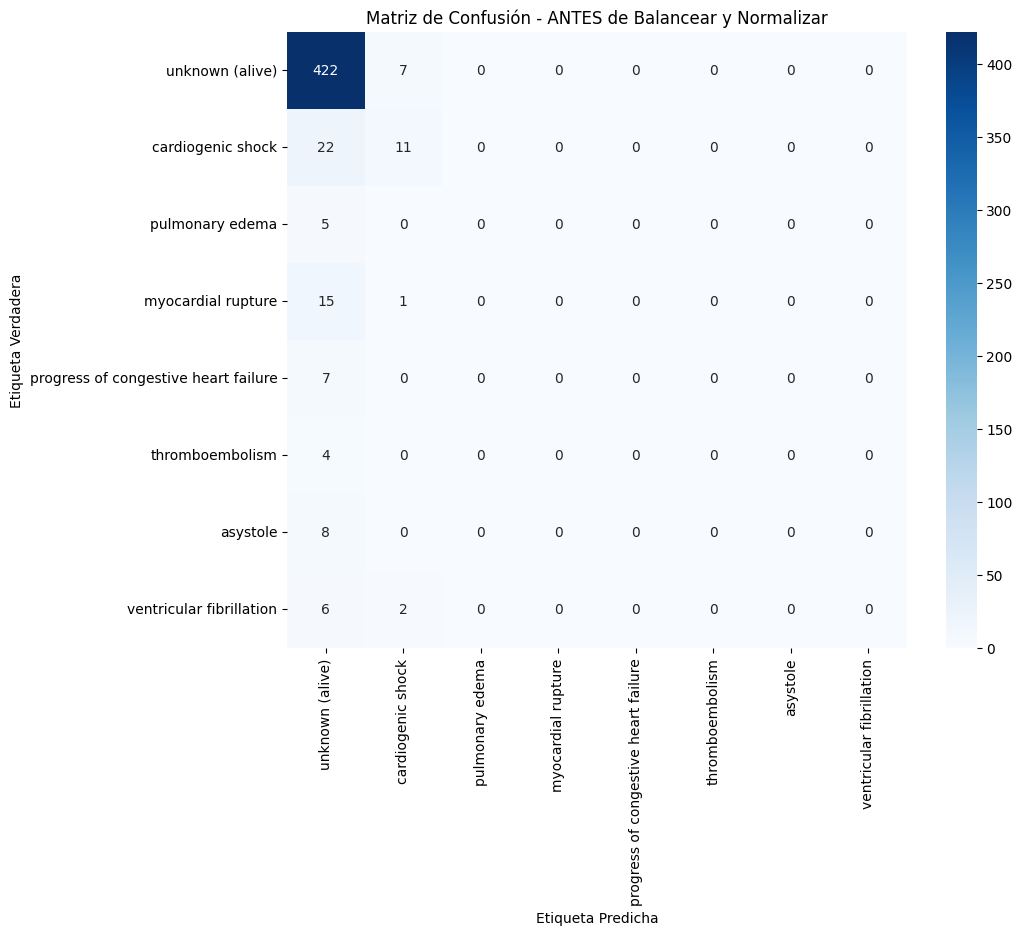

In [ ]:
classifier1.fit(x_train,y_train)
#Diccionario para almacenar datos de 23w
all_metrics = {}
target_names=['unknown (alive)','cardiogenic shock','pulmonary edema','myocardial rupture','progress of congestive heart failure','thromboembolism','asystole','ventricular fibrillation']
all_metrics['Modelo Base'] = evaluate_classifier_and_get_metrics(classifier1, x_test, y_test, target_names, title_prefix="ANTES de Balancear y Normalizar")


**1.4.2. Modelo Balanceado y sin normalizar**

In [ ]:
model_seed = 7
random.seed(model_seed)
np.random.seed(model_seed)

classifier2 = MLPClassifier(solver='adam', random_state=model_seed ,activation='relu', alpha=1e-12,tol=1e-12,
                    hidden_layer_sizes=(10,8),learning_rate='constant',
                    learning_rate_init=0.01, max_iter=500, momentum=0.9, verbose=True)

**Entrenar modelo(Balanceado y sin normalizar)**

Iteration 1, loss = 6.94286881
Iteration 2, loss = 3.20057792
Iteration 3, loss = 2.88873140
Iteration 4, loss = 2.77094608
Iteration 5, loss = 2.71712570
Iteration 6, loss = 2.68113479
Iteration 7, loss = 2.64696251
Iteration 8, loss = 2.62238527
Iteration 9, loss = 2.59935005
Iteration 10, loss = 2.58696133
Iteration 11, loss = 2.55909069
Iteration 12, loss = 2.53589369
Iteration 13, loss = 2.51691609
Iteration 14, loss = 2.50763222
Iteration 15, loss = 2.50714913
Iteration 16, loss = 2.42209947
Iteration 17, loss = 2.28566278
Iteration 18, loss = 2.19036104
Iteration 19, loss = 2.08512292
Iteration 20, loss = 2.02358465
Iteration 21, loss = 1.93245195
Iteration 22, loss = 1.84242086
Iteration 23, loss = 1.75716870
Iteration 24, loss = 1.67048202
Iteration 25, loss = 1.57601495
Iteration 26, loss = 1.50769963
Iteration 27, loss = 1.45251565
Iteration 28, loss = 1.36937052
Iteration 29, loss = 1.36659985
Iteration 30, loss = 1.31964558
Iteration 31, loss = 1.30692979
Iteration 32, los

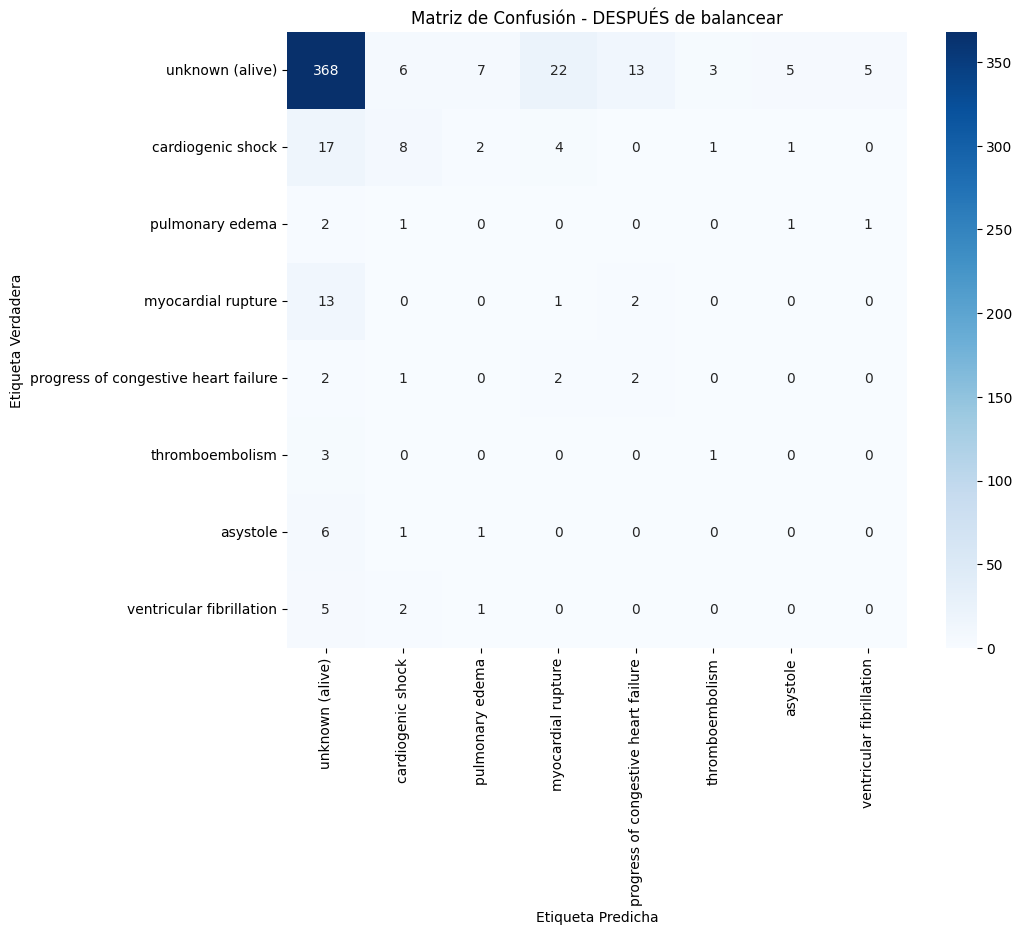

In [ ]:
classifier2.fit(X_res,y_encoded)
all_metrics['Con Balanceo'] = evaluate_classifier_and_get_metrics(classifier2, x_test, y_test, target_names, title_prefix="DESPUÉS de balancear")

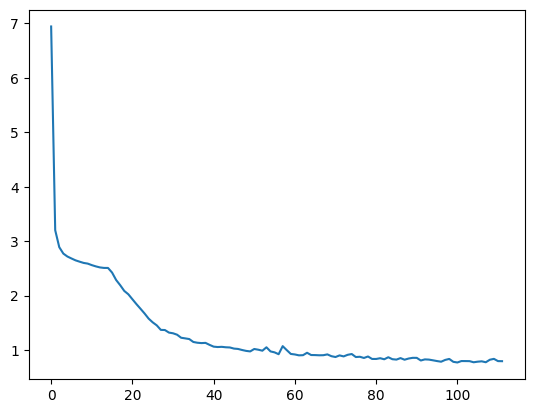

In [ ]:
plt.plot(classifier2.loss_curve_)

**1.4.3. Modelo sin balancear y normalizado**

In [ ]:
model_seed = 7
random.seed(model_seed)
np.random.seed(model_seed)

classifier3 = MLPClassifier(solver='adam', random_state=model_seed ,activation='relu', alpha=1e-12,tol=1e-12,
                    hidden_layer_sizes=(10,8),learning_rate='constant',
                    learning_rate_init=0.01, max_iter=500, momentum=0.9, verbose=True)

In [ ]:
print(len(X_nom_test))
print(len(y_test))

510
510


Iteration 1, loss = 5.16802964
Iteration 2, loss = 2.93945581
Iteration 3, loss = 1.65473829
Iteration 4, loss = 1.56282947
Iteration 5, loss = 1.39891219
Iteration 6, loss = 1.26607521
Iteration 7, loss = 1.19445605
Iteration 8, loss = 1.14054871
Iteration 9, loss = 1.10010688
Iteration 10, loss = 1.06296495
Iteration 11, loss = 1.03149583
Iteration 12, loss = 1.00511872
Iteration 13, loss = 0.97855054
Iteration 14, loss = 0.95595540
Iteration 15, loss = 0.93426720
Iteration 16, loss = 0.91427513
Iteration 17, loss = 0.89153040
Iteration 18, loss = 0.87438625
Iteration 19, loss = 0.86072110
Iteration 20, loss = 0.84890546
Iteration 21, loss = 0.83536391
Iteration 22, loss = 0.82490551
Iteration 23, loss = 0.81979080
Iteration 24, loss = 0.80947138
Iteration 25, loss = 0.80039913
Iteration 26, loss = 0.79293998
Iteration 27, loss = 0.78648469
Iteration 28, loss = 0.78262959
Iteration 29, loss = 0.77419504
Iteration 30, loss = 0.77268373
Iteration 31, loss = 0.76576812
Iteration 32, los

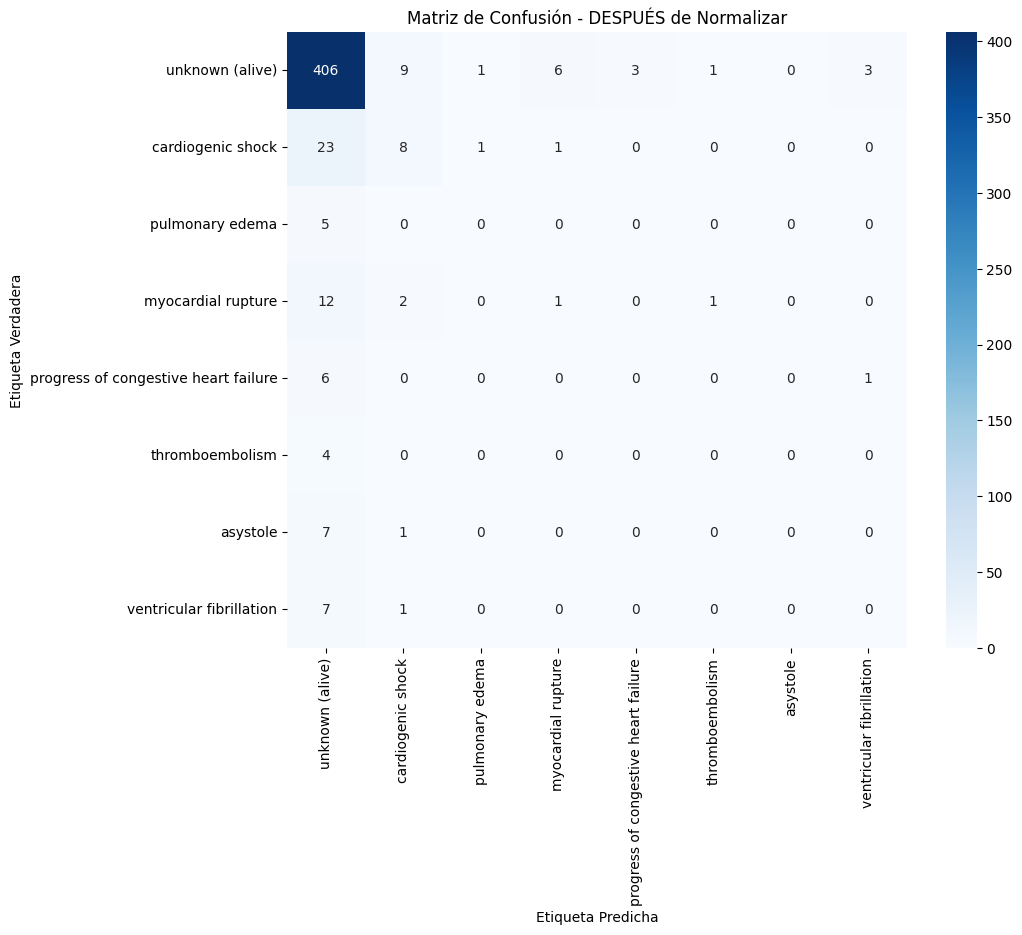

In [ ]:
classifier3.fit(X_nom_without_balance,y_train)
all_metrics['Con Normalización'] = evaluate_classifier_and_get_metrics(classifier3, X_nom_test, y_test, target_names, title_prefix="DESPUÉS de Normalizar")

**1.4.4. Construcción modelo(Balanceado y normalizado)**

In [ ]:
model_seed = 7
random.seed(model_seed)
np.random.seed(model_seed)

classifier4 = MLPClassifier(solver='adam', random_state=model_seed ,activation='relu', alpha=1e-12,tol=1e-12,
                    hidden_layer_sizes=(10,8),learning_rate='constant',
                    learning_rate_init=0.01, max_iter=500, momentum=0.9, verbose=True)

Iteration 1, loss = 3.65451903
Iteration 2, loss = 2.67456486
Iteration 3, loss = 2.27491924
Iteration 4, loss = 1.95052596
Iteration 5, loss = 1.67699954
Iteration 6, loss = 1.46606838
Iteration 7, loss = 1.27647631
Iteration 8, loss = 1.12847783
Iteration 9, loss = 1.00362607
Iteration 10, loss = 0.94345450
Iteration 11, loss = 0.86950858
Iteration 12, loss = 0.82008037
Iteration 13, loss = 0.79240695
Iteration 14, loss = 0.76138821
Iteration 15, loss = 0.71099442
Iteration 16, loss = 0.69043861
Iteration 17, loss = 0.66566025
Iteration 18, loss = 0.64880419
Iteration 19, loss = 0.62303962
Iteration 20, loss = 0.60245721
Iteration 21, loss = 0.58817789
Iteration 22, loss = 0.57826391
Iteration 23, loss = 0.57854449
Iteration 24, loss = 0.57270070
Iteration 25, loss = 0.54603972
Iteration 26, loss = 0.52769032
Iteration 27, loss = 0.52988783
Iteration 28, loss = 0.51512469
Iteration 29, loss = 0.50895434
Iteration 30, loss = 0.50364795
Iteration 31, loss = 0.50529043
Iteration 32, los

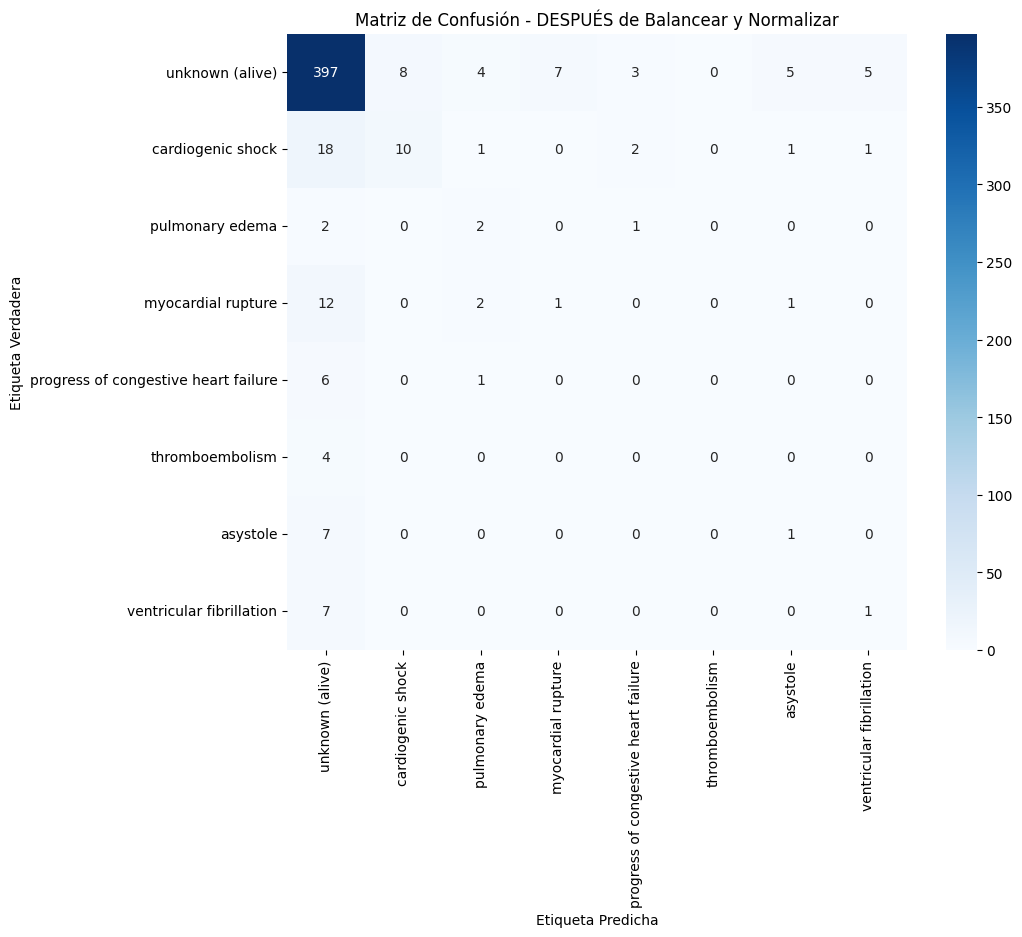

In [ ]:
classifier4.fit(X_nom,y_encoded)
all_metrics['Con Balanceo y Normalización'] = evaluate_classifier_and_get_metrics(classifier4, X_nom_test, y_test, target_names, title_prefix="DESPUÉS de Balancear y Normalizar")

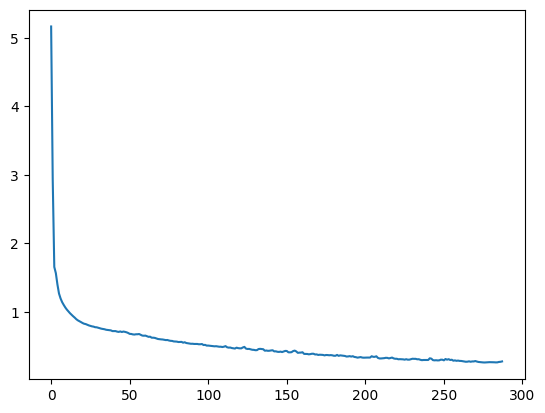

In [ ]:
plt.plot(classifier3.loss_curve_)

# **1.5. Comparación de los modelos**

In [ ]:
# Lista para almacenar los datos procesados para el DataFrame
processed_data = []

# Iterar sobre cada experimento y sus métricas
for model_name, metrics in all_metrics.items():
    # Añadir la fila de Accuracy General
    processed_data.append({
        'Modelo': model_name,
        'Métrica': 'Accuracy',
        'Clase': 'General',
        'Valor': metrics['accuracy']
    })

    # Iterar sobre cada clase en el reporte
    for class_name, class_metrics in metrics.items():
        if isinstance(class_metrics, dict):
            processed_data.append({
                'Modelo': model_name, 'Métrica': 'Precision', 'Clase': class_name, 'Valor': class_metrics['precision']
            })
            processed_data.append({
                'Modelo': model_name, 'Métrica': 'Recall', 'Clase': class_name, 'Valor': class_metrics['recall']
            })
            processed_data.append({
                'Modelo': model_name, 'Métrica': 'F1-score', 'Clase': class_name, 'Valor': class_metrics['f1-score']
            })

# Crear un DataFrame inicial
df_metrics = pd.DataFrame(processed_data)

# Definir el orden deseado para las filas y columnas
model_order = ['Modelo Base', 'Con Normalización', 'Con Balanceo', 'Con Balanceo y Normalización']
metric_order = ['Accuracy', 'Precision', 'Recall', 'F1-score']
class_order = ['General'] + target_names # Pone 'General' primero

# Convertir las columnas a tipo Categórico
df_metrics['Modelo'] = pd.Categorical(df_metrics['Modelo'], categories=model_order, ordered=True)
df_metrics['Métrica'] = pd.Categorical(df_metrics['Métrica'], categories=metric_order, ordered=True)
df_metrics['Clase'] = pd.Categorical(df_metrics['Clase'], categories=class_order, ordered=True)

# 3. Ordenar los datos primero por Clase, luego por Métrica
df_metrics = df_metrics.sort_values(by=['Clase', 'Métrica'])

final_table = df_metrics.pivot_table(
    index=['Clase', 'Métrica'],
    columns='Modelo',
    values='Valor',
    sort=False
)

display(final_table.style.format("{:.3f}").background_gradient(cmap='Greens', axis=1, low=0, high=1))

/tmp/ipython-input-4050183336.py:43: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  final_table = df_metrics.pivot_table(
